<a href="https://colab.research.google.com/github/davideploy/Analise-Financeira-Colab/blob/main/An%C3%A1lise_Financeira_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise Financeira com Python

### 1. Objetivos

- Importar, tratar e visualizar dados dos ativos 
- Plotar gráficos 
- Comparar a carteira com o IBOV 

### 2. Importar e visualizar a carteira

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

carteira = pd.read_excel(
    '/content/drive/MyDrive/carteira_poli.xlsx' # faça o download da planilha no diretório MyDrive
)
display(carteira)

,Ativos,Tipo,Valor Investido
0,ITUB4,Ação,15000.0
1,BBDC4,Ação,5000.0
2,BBAS3,Ação,20000.0
3,PETR4,Ação,30000.0
4,IVVB11,ETF,5000.0
5,SMAL11,ETF,5000.0
6,GOGL34,BDR,10000.0
7,NFLX34,BDR,5000.0
8,HGLG11,FII,5000.0
9,XPLG11,FII,10000.0


In [ ]:
carteira_tipos = carteira.groupby('Tipo').sum()
display(carteira_tipos)

,Valor Investido
Tipo,
Ação,70000.0
BDR,15000.0
ETF,10000.0
FII,35000.0
Renda Fixa,50000.0


Referência: 
- Gráfico de pizza: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
- Legenda: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

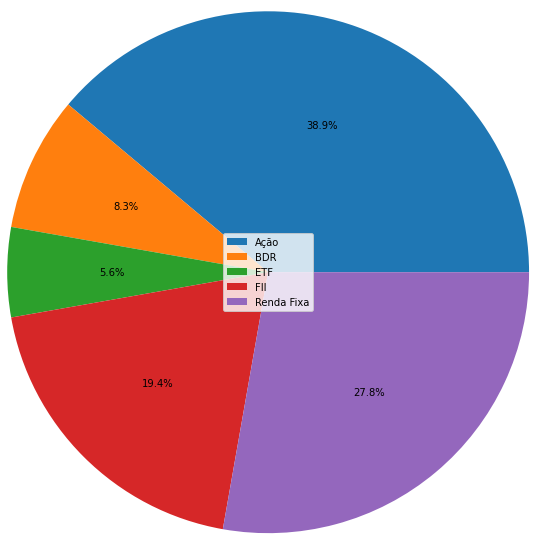

In [ ]:
plt.pie(carteira_tipos['Valor Investido'], autopct='%.1f%%', radius=3)
plt.legend(carteira_tipos.index, loc='center')

plt.show()

### Bônus: Pegar sempre a data de hoje

In [32]:
import time

data = time.gmtime()
# print(data)

hoje = f'{data.tm_year}-{data.tm_mon}-{data.tm_mday}'
data_final = hoje
data_inicio = '2019-01-01'

print(data_final)

2022-8-8


### 3. IBOV

In [31]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

cotacao_ibov = yf.download('^BVSP', start=data_inicio, end=data_final)
display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,91012.0,5615400
2019-01-03,91011.0,91596.0,89922.0,91564.0,91564.0,6066200
2019-01-04,91577.0,92701.0,90824.0,91841.0,91841.0,5322100
2019-01-07,91845.0,92552.0,91288.0,91699.0,91699.0,4565000
2019-01-08,91699.0,92231.0,91064.0,92032.0,92032.0,4496500
...,...,...,...,...,...,...
2022-08-01,103165.0,103317.0,101764.0,102225.0,102225.0,11626700
2022-08-02,102225.0,103660.0,101694.0,103362.0,103362.0,10124500
2022-08-03,103362.0,103878.0,102822.0,103775.0,103775.0,12379600


In [ ]:
cotacao_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2019-01-02 to 2022-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       893 non-null    float64
 1   High       893 non-null    float64
 2   Low        893 non-null    float64
 3   Close      893 non-null    float64
 4   Adj Close  893 non-null    float64
 5   Volume     893 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.8 KB


In [ ]:
cotacao_ibov.describe()

,Open,High,Low,Close,Adj Close,Volume
count,893.000000,893.000000,893.000000,893.000000,893.000000,8.930000e+02
mean,105877.118701,106904.279955,104835.984323,105895.416573,105895.416573,8.622193e+06
std,11856.526494,11629.740671,12021.850894,11841.451837,11841.451837,3.551055e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,98308.000000,99240.000000,97467.000000,98311.000000,98311.000000,5.398900e+06
50%,105303.000000,106125.000000,104337.000000,105351.000000,105351.000000,8.830700e+06
75%,115057.000000,115599.000000,113712.000000,114992.000000,114992.000000,1.113470e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.176870e+07


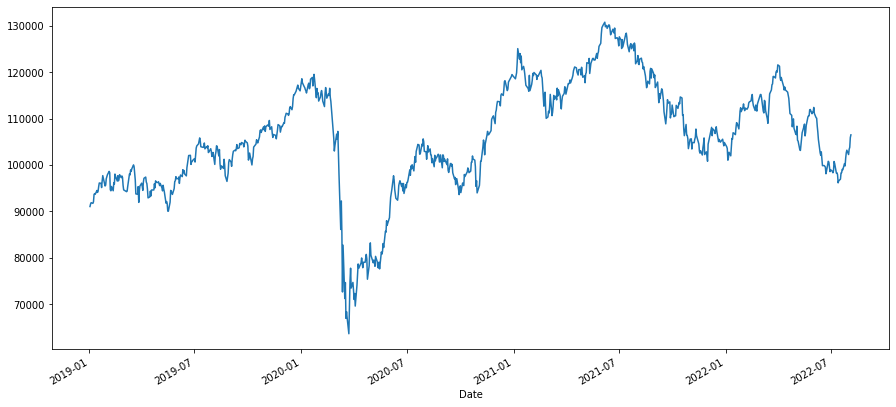

In [ ]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 7))

In [ ]:
pip install mplfinance

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


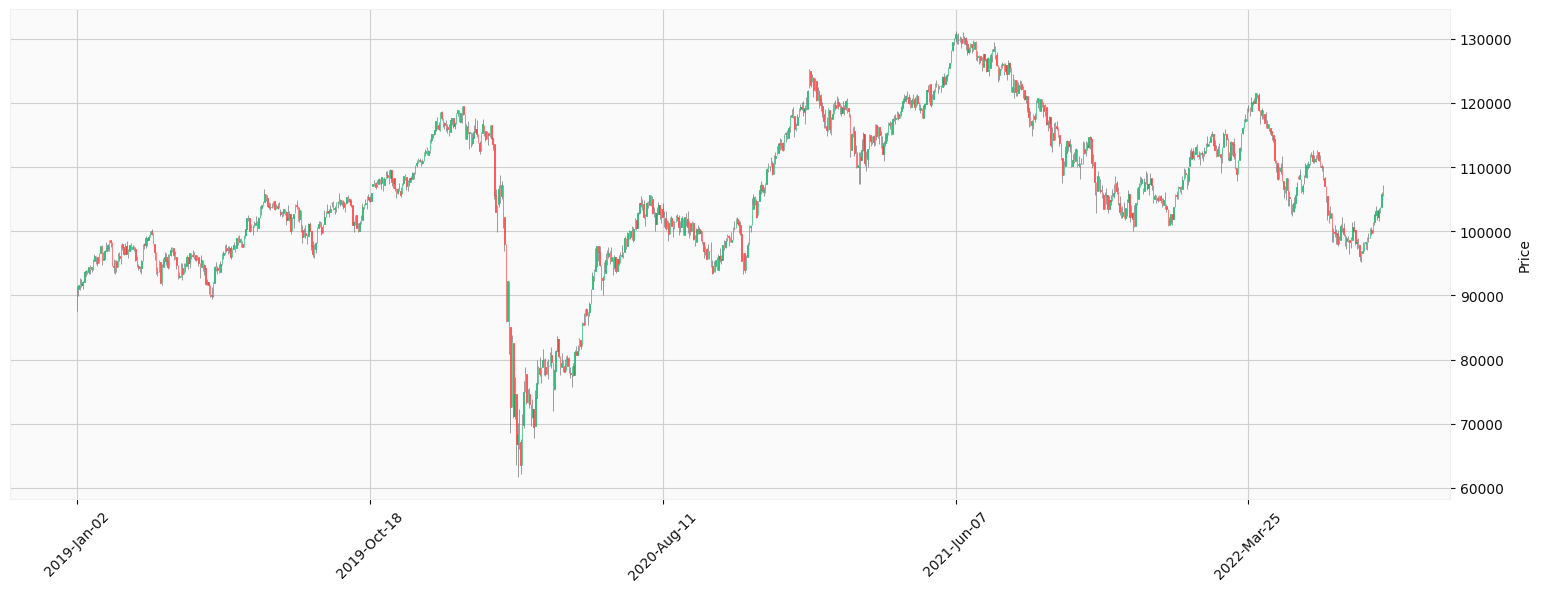

In [ ]:
import mplfinance as mpf

mpf.plot(cotacao_ibov, type='candle', style='yahoo', figsize=(20, 7)) # colocar iloc[400:500] para sumir o warning

### 4. Importar e visualizar dados dos ativos

##### Ativos de renda variável da carteira

In [ ]:
# cotacao_itau = yf.download('ITUB4.SA', start='2021-01-01', end=hoje)
# display(cotacao_itau)

cotacao_ativos = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'tesouro' not in ativo.lower():
        cotacao_ativos[ativo] = yf.download('{}.SA'.format(ativo), start=data_inicio, end=data_final)['Adj Close']

# display(cotacao_ativos.info())
# cotacao_ativos = cotacao_ativos.bfill()
display(cotacao_ativos)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FLRP11.SA: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


,ITUB4,BBDC4,BBAS3,PETR4,IVVB11,SMAL11,GOGL34,NFLX34,HGLG11,XPLG11,FLRP11,MALL11
Date,,,,,,,,,,,,
2019-01-02,32.911713,21.356339,39.050591,15.524001,74.250000,89.000000,1.344750,20.321600,134.438156,NaN,NaN,103.479492
2019-01-03,33.454308,21.572695,39.211288,15.904681,74.250000,89.000000,1.289583,20.378799,134.485855,NaN,NaN,102.906242
2019-01-04,32.893925,21.403408,39.211288,15.949845,74.250000,90.500000,1.331250,21.927000,133.817963,NaN,NaN,102.993690
2019-01-07,32.956200,21.657337,38.954151,16.201481,74.250000,88.199997,1.331250,23.416599,135.010635,NaN,NaN,102.935387
2019-01-08,33.374256,21.789585,38.512234,16.104696,74.250000,88.830002,1.339916,23.788401,135.487717,NaN,NaN,102.760498
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,23.469999,17.371025,35.680000,33.680000,233.949997,96.699997,3.940000,23.309999,166.309998,95.800003,NaN,101.019997
2022-08-02,23.719999,17.670000,36.160000,33.830002,237.000000,97.000000,4.040000,23.309999,166.369995,95.809998,NaN,100.820000
2022-08-03,23.889999,17.950001,36.410000,33.849998,240.550003,98.900002,4.170000,23.910000,166.699997,95.000000,NaN,100.800003


##### Ativos de renda fixa da carteira

In [ ]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro = pd.read_csv(link, sep=';', decimal=',')

tesouro['Data Base'] = pd.to_datetime(tesouro['Data Base'])
display(tesouro)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,01/04/2021,2016-05-13,5.84,5.88,3529.88,3524.20,3521.43
1,Tesouro Prefixado,01/01/2019,2016-05-13,12.34,12.40,737.64,736.61,736.27
2,Tesouro Prefixado,01/01/2021,2016-05-13,12.18,12.24,588.35,586.90,586.63
3,Tesouro IPCA+ com Juros Semestrais,15/05/2017,2016-05-13,6.08,6.10,2872.92,2872.39,2954.81
4,Tesouro Prefixado com Juros Semestrais,01/01/2023,2016-05-13,12.17,12.23,944.93,942.53,942.10
...,...,...,...,...,...,...,...,...
123971,Tesouro Prefixado com Juros Semestrais,01/01/2025,2015-08-18,13.66,13.72,832.47,829.89,829.47
123972,Tesouro Prefixado com Juros Semestrais,01/01/2017,2015-08-18,13.90,13.94,968.23,967.79,967.29
123973,Tesouro Selic,07/03/2017,2015-08-18,0.00,0.02,7054.82,7052.65,7048.91
123974,Tesouro IPCA+,15/05/2019,2015-08-18,7.13,7.17,2081.76,2078.88,2078.11


In [ ]:
tesouro_selic = tesouro.loc[tesouro['Tipo Titulo']=='Tesouro Selic'].reset_index(drop=True)
display(tesouro_selic)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Selic,01/03/2021,2016-05-24,0.02,0.06,7791.79,7777.05,7772.91
1,Tesouro Selic,07/03/2017,2016-05-24,0.00,0.01,7799.18,7798.57,7794.44
2,Tesouro Selic,01/03/2021,2016-04-26,0.02,0.06,7710.26,7695.42,7691.34
3,Tesouro Selic,07/03/2017,2016-04-26,0.00,0.01,7717.69,7717.02,7712.94
4,Tesouro Selic,01/03/2021,2016-05-17,0.03,0.07,7767.63,7752.87,7748.75
...,...,...,...,...,...,...,...,...
16542,Tesouro Selic,07/03/2017,2015-11-20,0.00,0.02,7299.80,7297.93,7294.06
16543,Tesouro Selic,01/03/2021,2015-08-14,0.00,0.04,7047.41,7031.92,7028.19
16544,Tesouro Selic,07/03/2017,2015-08-14,0.00,0.02,7047.41,7045.23,7041.50
16545,Tesouro Selic,01/03/2021,2015-08-18,0.00,0.04,7054.82,7039.33,7035.59


##### Juntando os ativos

In [ ]:
tesouro_selic = tesouro_selic.rename(columns={'Data Base': 'Date', 'PU Base Manha': 'Tesouro Selic'})
cotacoes = cotacao_ativos.merge(tesouro_selic[['Date', 'Tesouro Selic']], on='Date')
cotacoes = cotacoes.set_index('Date')
display(cotacoes)

,ITUB4,BBDC4,BBAS3,PETR4,IVVB11,SMAL11,GOGL34,NFLX34,HGLG11,XPLG11,FLRP11,MALL11,Tesouro Selic
Date,,,,,,,,,,,,,
2019-01-02,32.911713,21.356339,39.050591,15.524001,74.250000,89.000000,1.344750,20.321600,134.438156,NaN,NaN,103.479492,9900.45
2019-01-02,32.911713,21.356339,39.050591,15.524001,74.250000,89.000000,1.344750,20.321600,134.438156,NaN,NaN,103.479492,9930.40
2019-01-02,32.911713,21.356339,39.050591,15.524001,74.250000,89.000000,1.344750,20.321600,134.438156,NaN,NaN,103.479492,9916.38
2019-01-03,33.454308,21.572695,39.211288,15.904681,74.250000,89.000000,1.289583,20.378799,134.485855,NaN,NaN,102.906242,9949.78
2019-01-03,33.454308,21.572695,39.211288,15.904681,74.250000,89.000000,1.289583,20.378799,134.485855,NaN,NaN,102.906242,9979.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,23.889999,17.950001,36.410000,33.849998,240.550003,98.900002,4.170000,23.910000,166.699997,95.000000,NaN,100.800003,11400.74
2022-08-04,24.469999,18.280001,37.099998,34.209999,237.699997,104.139999,4.140000,24.100000,167.529999,95.480003,NaN,100.940002,11533.17
2022-08-04,24.469999,18.280001,37.099998,34.209999,237.699997,104.139999,4.140000,24.100000,167.529999,95.480003,NaN,100.940002,11516.16


In [ ]:
display(cotacoes.info())
# cotacoes = cotacoes.bfill()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2019-01-02 to 2022-08-04
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ITUB4          2596 non-null   float64
 1   BBDC4          2596 non-null   float64
 2   BBAS3          2596 non-null   float64
 3   PETR4          2596 non-null   float64
 4   IVVB11         2596 non-null   float64
 5   SMAL11         2596 non-null   float64
 6   GOGL34         2596 non-null   float64
 7   NFLX34         2596 non-null   float64
 8   HGLG11         2596 non-null   float64
 9   XPLG11         1683 non-null   float64
 10  FLRP11         0 non-null      float64
 11  MALL11         2596 non-null   float64
 12  Tesouro Selic  2596 non-null   float64
dtypes: float64(13)
memory usage: 283.9 KB


None

In [ ]:
cotacoes = cotacoes.groupby(cotacoes.index).mean()
display(cotacoes)

,ITUB4,BBDC4,BBAS3,PETR4,IVVB11,SMAL11,GOGL34,NFLX34,HGLG11,XPLG11,FLRP11,MALL11,Tesouro Selic
Date,,,,,,,,,,,,,
2019-01-02,32.911713,21.356339,39.050591,15.524001,74.250000,89.000000,1.344750,20.321600,134.438156,NaN,NaN,103.479492,9915.743333
2019-01-03,33.454308,21.572695,39.211288,15.904681,74.250000,89.000000,1.289583,20.378799,134.485855,NaN,NaN,102.906242,9965.050000
2019-01-04,32.893925,21.403408,39.211288,15.949845,74.250000,90.500000,1.331250,21.927000,133.817963,NaN,NaN,102.993690,10012.756667
2019-01-07,32.956200,21.657337,38.954151,16.201481,74.250000,88.199997,1.331250,23.416599,135.010635,NaN,NaN,102.935387,10177.873333
2019-01-08,33.374256,21.789585,38.512234,16.104696,74.250000,88.830002,1.339916,23.788401,135.487717,NaN,NaN,102.760498,10235.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,23.682291,17.371025,36.209999,32.290001,230.800003,96.260002,3.920000,23.250000,167.281693,96.214798,NaN,99.636436,11918.245000
2022-07-29,23.602350,17.410982,35.970001,34.150002,234.500000,95.650002,3.990000,23.309999,167.539993,96.860001,NaN,100.500000,11924.175000
2022-08-02,23.719999,17.670000,36.160000,33.830002,237.000000,97.000000,4.040000,23.309999,166.369995,95.809998,NaN,100.820000,11292.245000


### 5. Visualizar cotação dos ativos da carteira

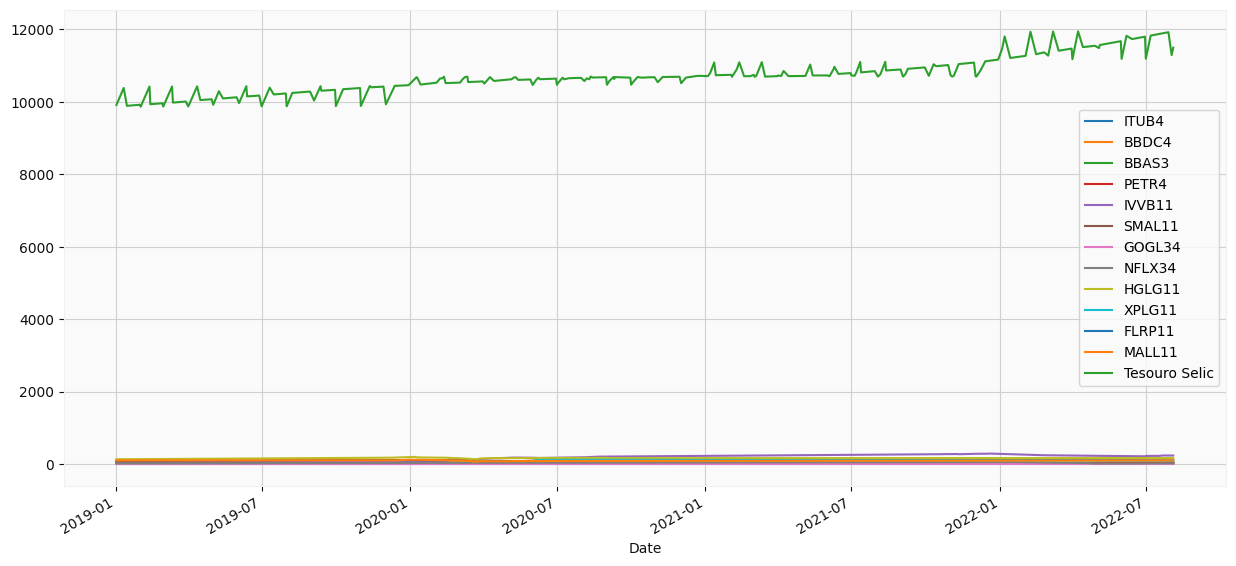

In [ ]:
# Mostrar a necessidade de normalizar os ativos
cotacoes.plot(figsize=(15, 7))
plt.show()

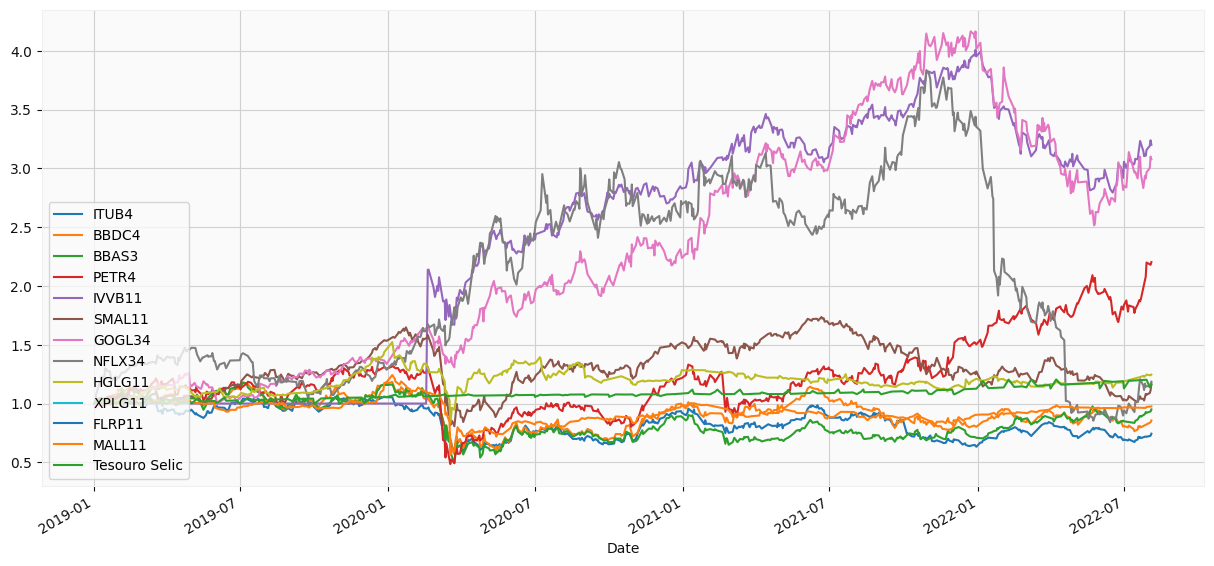

In [ ]:
ativos_normalizados = cotacoes / cotacoes.iloc[0]
ativos_normalizados.plot(figsize=(15, 7))
plt.legend(loc='lower left')
plt.show()

### 6. Rentabilidade da carteira e do IBOV no período

Rentabilidade da carteira e do IBOV no período

In [ ]:
ativos_normalizados['Total'] = ativos_normalizados.sum(axis=1)
ativos_normalizados = ativos_normalizados / ativos_normalizados.iloc[0]

retorno_carteira = ativos_normalizados['Total'][-1] / ativos_normalizados['Total'][0] - 1
retorno_selic = ativos_normalizados['Tesouro Selic'][-1] / ativos_normalizados['Tesouro Selic'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1

print('Retorno da carteira: {:.2%}'.format(retorno_carteira))
print('Retorno do tesouto selic: {:.2%}'.format(retorno_selic))
print('Retorno do IBOV: {:.2%}'.format(retorno_ibov))

Retorno da carteira: 52.46%
Retorno do tesouto selic: 15.95%
Retorno do IBOV: 16.99%


Agora, vamos visualizar as variações no período

[]

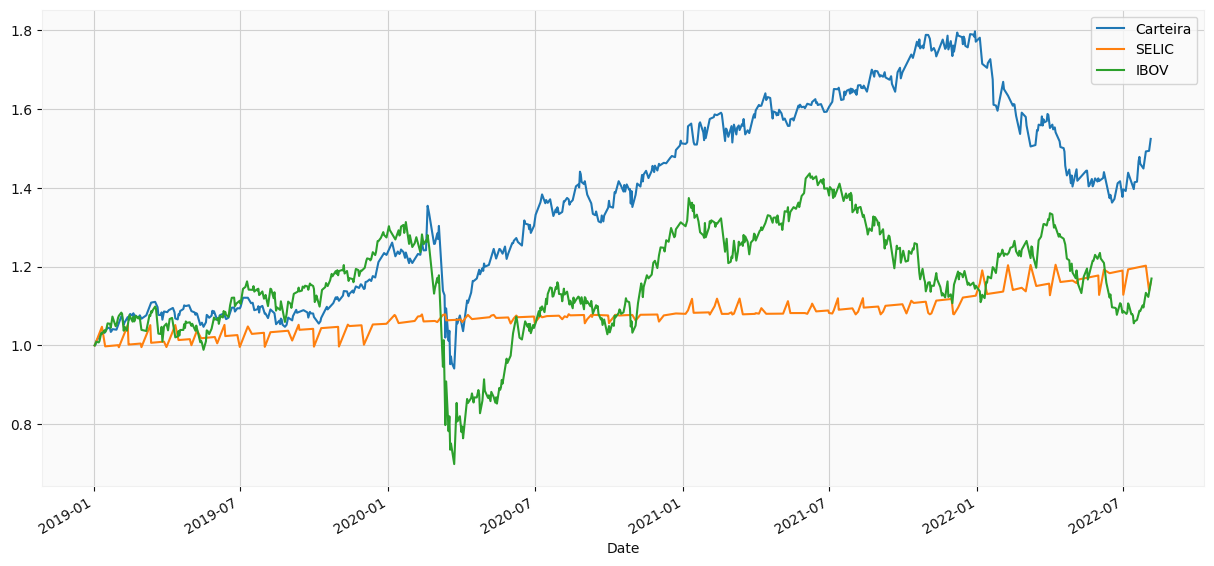

In [ ]:
ibov_normalizado = cotacao_ibov / cotacao_ibov.iloc[0]

ativos_normalizados['Total'].plot(figsize=(15,7), label='Carteira')
ativos_normalizados['Tesouro Selic'].plot(label='SELIC')
ibov_normalizado['Adj Close'].plot(label='IBOV')

plt.legend()
plt.plot()